In [1]:
## modified from https://scikit-image.org/docs/stable/auto_examples/filters/plot_restoration.html


# Image Deconvolution

In this example, we deconvolve a noisy version of an image using Wiener
and unsupervised Wiener algorithms. These algorithms are based on
linear models that can't restore sharp edge as much as non-linear
methods (like TV restoration) but are much faster.

## Wiener filter
The inverse filter based on the PSF (Point Spread Function),
the prior regularization (penalisation of high frequency) and the
tradeoff between the data and prior adequacy. The regularization
parameter must be hand tuned.

## Unsupervised Wiener
This algorithm has a self-tuned regularization parameters based on
data learning. This is not common and based on the following
publication [1]_. The algorithm is based on an iterative Gibbs sampler that
draw alternatively samples of posterior conditional law of the image,
the noise power and the image frequency power.

.. [1] François Orieux, Jean-François Giovannelli, and Thomas
       Rodet, "Bayesian estimation of regularization and point
       spread function parameters for Wiener-Hunt deconvolution",
       J. Opt. Soc. Am. A 27, 1593-1607 (2010)
       https://www.osapublishing.org/josaa/abstract.cfm?URI=josaa-27-7-1593
       https://hal.archives-ouvertes.fr/hal-00674508


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration

# astro = color.rgb2gray(data.astronaut())
from scipy.signal import convolve2d as conv2

In [3]:
rng = np.random.default_rng()
astro = data.astronaut().astype('float') / 255

psf = np.ones((5, 5)) / 25

for i in range(3):
    astro[:, :, i] = conv2(astro[:,:,i], psf, 'same')



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


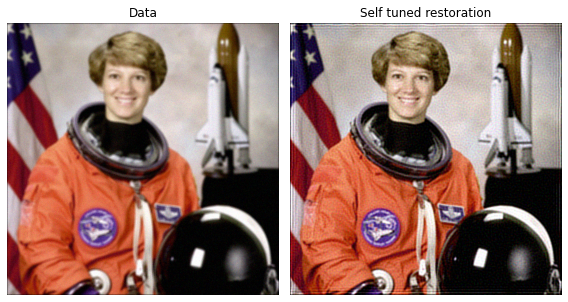

In [4]:

astro += 0.1 * astro.std() * rng.standard_normal(astro.shape)

astro_deconvolved = astro.copy()
for i in range(3):
    deconvolved, _ = restoration.unsupervised_wiener(astro[:,:,i], psf)
    # deconvolved = restoration.wiener(astro[:,:,i], psf, 0.1)

    astro_deconvolved[:,:,i] = deconvolved
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True)

# plt.gray()
# astro_deconvolved -= astro_deconvolved.min()
# astro_deconvolved /= astro_deconvolved.max()

ax[0].imshow(astro, vmin=astro_deconvolved.min(), vmax=astro_deconvolved.max())
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(astro_deconvolved)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

fig.tight_layout()

plt.show()

In [5]:
import imageio

imageio.imwrite('astro_deconvolved.jpg', astro_deconvolved)


Lossy conversion from float64 to uint8. Range [-0.3618879526643114, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.12861422712831833, 1.1027952362033542]. Convert image to uint8 prior to saving to suppress this warning.
